In [1]:
#Tarefa 4 (Deep Learning), Reconhecimento de Classes de Imagens
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import sys
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from PIL import Image

In [2]:
AccuracyTotal_val = []
LossTotal_val = []
AccuracyTotal_Train = []
LossTotal_Train = []
E = 20 #numero de epocas
K = 7 #numero de folds

In [3]:
#Loop para reproduzir o k-fold (cada ciclo do loop é um fold diferente)
#em cada loop é escolhido aleatóriamente 20% dos dados par ser teste (validação), e a rede é redefinida
for k in range(K):
    dat_file = open(r"minitest.csv", "r")
    dat = dat_file.read().split("\n")[1:-1]
    dat_file.close()
    print(f'\n\n\n----------------------------------   Fold {k+1}   ------------------------------\n\n')
    np.random.shuffle(dat)
    label_conv = {"graduation":0, "meeting":1, "picnic":2}
    figures = []
    labels = []
    
    #Aqui converte a imagem para escala de cinza, e armazena todas as imagens na lista figures
    for i in range(len(dat)):

        dat[i] = dat[i].split("\t")
        dat[i][1] = label_conv[dat[i][1]]
        im = Image.open(r"resize/"+dat[i][0]).convert("L")
        figures.append(np.array(im))
        labels.append(np.array(dat[i][1]))
    labels = np.array(labels)
    figures = np.array(figures)
    num_filters = 30
    filter_size = 5
    pool_size = 2
    model = Sequential([
                  Conv2D(64, 3, input_shape = (100,100,1)),
                  MaxPooling2D(pool_size = 2),
                  Dropout(0.4),
                  Conv2D(32, 3),
                  MaxPooling2D(pool_size = 2),
                  Dropout(0.4),
                  Conv2D(32, 3),
                  MaxPooling2D(pool_size = 2),
                  Dropout(0.3),
                  Flatten(),
                  Dense(128, activation = 'relu'),
                  Dense(64, activation = 'relu'),
                  #Dropout(0.2),
                  Dense(3, activation = 'softmax'),
                             ])
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    figures = np.expand_dims(figures, axis=3) #transforma o conjunto de arrays em um tensor(3 dimensões)
    print(figures.shape)
    p = int(0.2*len(figures))
    history = model.fit(figures[p:], to_categorical(labels[p:]),epochs=E, batch_size=100, validation_data=(figures[:p], to_categorical(labels[:p])))
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #armazena o resultado de cada fold
    AccuracyTotal_val.append(val_acc)
    AccuracyTotal_Train.append(acc)
    LossTotal_val.append(val_loss)
    LossTotal_Train.append(loss)




----------------------------------   Fold 1   ------------------------------


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
________________________________________

Epoch 8/20
168/168 [==============================] - 259s 2s/step - loss: 0.9526 - accuracy: 0.5572 - val_loss: 2.9043 - val_accuracy: 0.3793
Epoch 9/20
168/168 [==============================] - 258s 2s/step - loss: 0.9365 - accuracy: 0.5685 - val_loss: 2.2458 - val_accuracy: 0.4105
Epoch 10/20
168/168 [==============================] - 257s 2s/step - loss: 0.9308 - accuracy: 0.5739 - val_loss: 3.7234 - val_accuracy: 0.4136
Epoch 11/20
168/168 [==============================] - 257s 2s/step - loss: 0.9217 - accuracy: 0.5774 - val_loss: 4.3504 - val_accuracy: 0.3967
Epoch 12/20
168/168 [==============================] - 257s 2s/step - loss: 0.9088 - accuracy: 0.5840 - val_loss: 2.2419 - val_accuracy: 0.4122
Epoch 13/20
168/168 [==============================] - 256s 2s/step - loss: 0.9034 - accuracy: 0.5886 - val_loss: 3.1171 - val_accuracy: 0.3762
Epoch 14/20
168/168 [==============================] - 257s 2s/step - loss: 0.9022 - accuracy: 0.5879 - val_loss: 1.5790 - val_accuracy: 0

168/168 [==============================] - 257s 2s/step - loss: 2.9398 - accuracy: 0.3986 - val_loss: 2.2792 - val_accuracy: 0.3679
Epoch 2/20
168/168 [==============================] - 257s 2s/step - loss: 1.0665 - accuracy: 0.4627 - val_loss: 3.3196 - val_accuracy: 0.3888
Epoch 3/20
168/168 [==============================] - 257s 2s/step - loss: 1.0062 - accuracy: 0.5073 - val_loss: 2.5382 - val_accuracy: 0.4053
Epoch 4/20
168/168 [==============================] - 256s 2s/step - loss: 0.9815 - accuracy: 0.5338 - val_loss: 2.6284 - val_accuracy: 0.3464
Epoch 5/20
168/168 [==============================] - 257s 2s/step - loss: 0.9697 - accuracy: 0.5399 - val_loss: 3.5441 - val_accuracy: 0.4265
Epoch 6/20
168/168 [==============================] - 257s 2s/step - loss: 0.9577 - accuracy: 0.5524 - val_loss: 2.8513 - val_accuracy: 0.4167
Epoch 7/20
168/168 [==============================] - 257s 2s/step - loss: 0.9414 - accuracy: 0.5658 - val_loss: 1.9106 - val_accuracy: 0.3128
Epoch 8/20

168/168 [==============================] - 256s 2s/step - loss: 3.8006 - accuracy: 0.4051 - val_loss: 19.0468 - val_accuracy: 0.3300
Epoch 2/20
168/168 [==============================] - 257s 2s/step - loss: 1.0507 - accuracy: 0.4806 - val_loss: 3.6545 - val_accuracy: 0.3121
Epoch 3/20
168/168 [==============================] - 258s 2s/step - loss: 1.0002 - accuracy: 0.5087 - val_loss: 12.4126 - val_accuracy: 0.3252
Epoch 4/20
168/168 [==============================] - 257s 2s/step - loss: 0.9802 - accuracy: 0.5310 - val_loss: 20.4778 - val_accuracy: 0.3314
Epoch 5/20
168/168 [==============================] - 257s 2s/step - loss: 0.9693 - accuracy: 0.5335 - val_loss: 13.1911 - val_accuracy: 0.3252
Epoch 6/20
168/168 [==============================] - 256s 2s/step - loss: 0.9577 - accuracy: 0.5482 - val_loss: 3.6576 - val_accuracy: 0.2907
Epoch 7/20
168/168 [==============================] - 257s 2s/step - loss: 0.9421 - accuracy: 0.5577 - val_loss: 18.2555 - val_accuracy: 0.3214
Epoch

In [ ]:
#esse trecho do codigo foi usado apenas para reduzir o tamanho das imagens, a rede só foi usada depois de ter rodada 
#essa parte. Despois de transformado o tamanho das imagens nao precisa mais usar isso. 
'''for i in range(len(dat)):
    print(len(dat)-i)
    image = Image.open('data_folder/' + dat[i].split('\t')[0])
    #Matrix.append(np.asarray(Image.open('data_folder/' + data['filename'][0])))
    new_image = image.resize((100, 100))
    new_image.save('resize/'+dat[i].split('\t')[0])'''

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


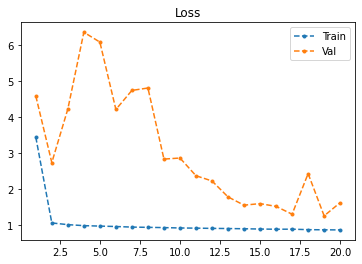

In [4]:
epoch = np.array(range(E))+ 1
print(epoch)
#plot das Loss (média entre os K-folds) de treino e de cada validação (calculado em cada época)
plt.plot(epoch, sum(np.array(LossTotal_Train))/len(LossTotal_Train),  '--.', label = 'Train')
plt.plot(epoch, sum(np.array(LossTotal_val))/len(LossTotal_val), '--.', label = 'Val')
plt.title('Loss')
plt.legend()

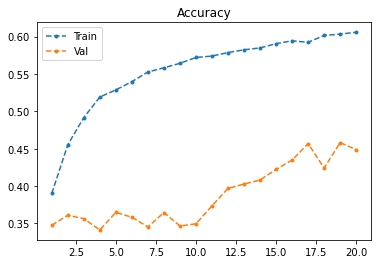

In [5]:
#plot das Accuracy (média entre os K-folds) de treino e de cada validação (calculado em cada época)
plt.plot(epoch, sum(np.array(AccuracyTotal_Train))/len(AccuracyTotal_Train),  '--.', label = 'Train')
plt.plot(epoch, sum(np.array(AccuracyTotal_val))/len(AccuracyTotal_val), '--.', label = 'Val')
plt.title('Accuracy')
plt.legend()